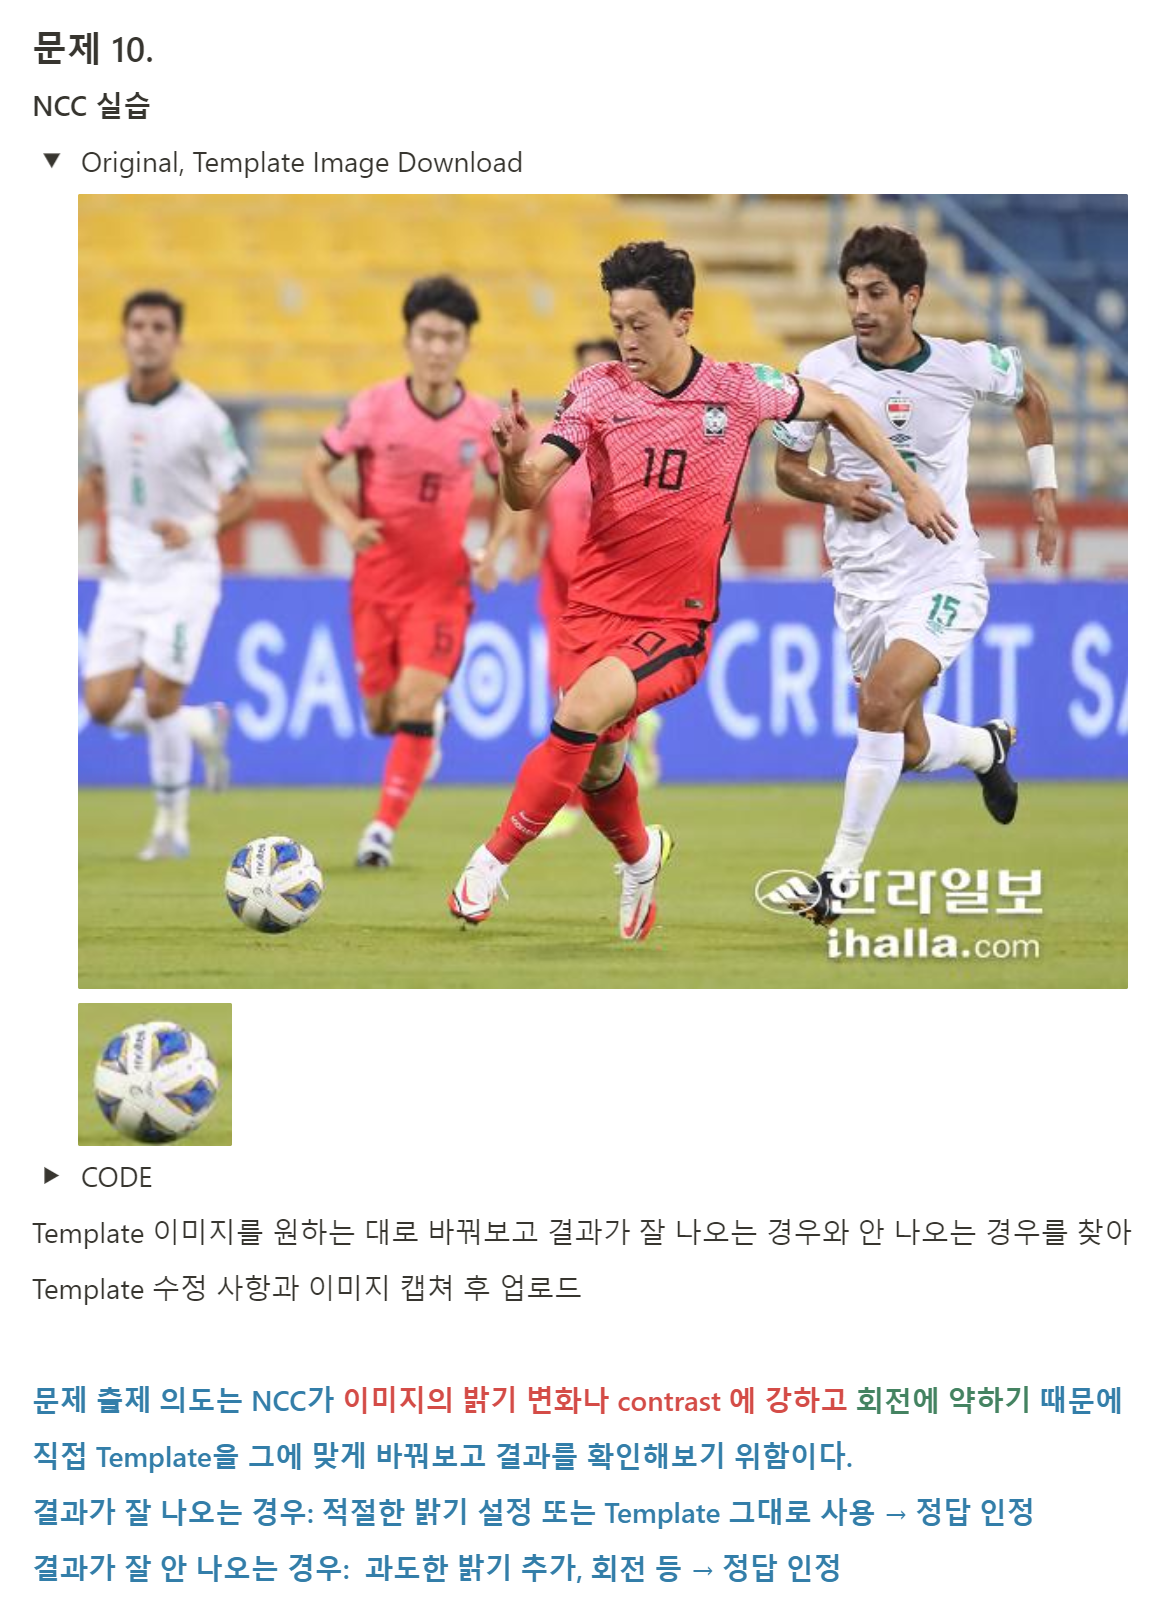

In [ ]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import cv2

src=cv2.imread('/content/drive/MyDrive/축구.png',cv2.IMREAD_GRAYSCALE)
template_1=cv2.imread('/content/drive/MyDrive/공.png',cv2.IMREAD_GRAYSCALE)
##########################################################

template=template_1
#원하는 대로 바꿔보기

##########################################################
result=cv2.matchTemplate(src,template,cv2.TM_CCORR_NORMED)
result_norm= cv2.normalize(result,None,0,255,cv2.NORM_MINMAX,cv2.CV_8U)
##########################################################
_,maxv,_,maxloc=cv2.minMaxLoc(result)
print(f'maxv: {maxv}')
print(f'maxloc: {maxloc}')

th,tw=template.shape[:2]

dst=cv2.cvtColor(src,cv2.COLOR_GRAY2BGR)
cv2.rectangle(dst,maxloc,(maxloc[0]+tw,maxloc[1]+th),(0,0,255),2)

template=cv2.cvtColor(template, cv2.COLOR_BGR2RGB)
result_norm=cv2.cvtColor(result_norm, cv2.COLOR_BGR2RGB)
dst=cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)


#시각화
fig=plt.figure(figsize=(16, 16))
rows = 1; cols = 3

ax1 = fig.add_subplot(rows, cols, 1)
ax1.set_title('Template')
ax1.grid(False)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.imshow(template)

ax2 = fig.add_subplot(rows, cols, 2)
ax2.set_title('Matching Result')
ax2.grid(False)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.imshow(result_norm)

ax3 = fig.add_subplot(rows, cols, 3)
ax3.set_title('Result')
ax3.grid(False)
ax3.set_xticks([])
ax3.set_yticks([])
ax3.imshow(dst)

fig.tight_layout()
plt.show()

결과가 잘 나오는 경우

maxv: 0.9745535850524902
maxloc: (71, 346)


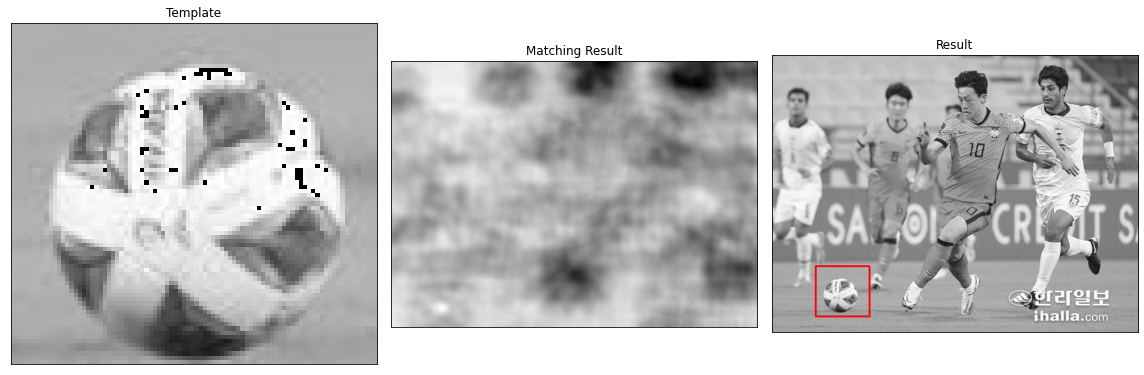

In [13]:
template= template_1 +5

결과가 잘 나오지 않는 경우

maxv: 0.974842369556427
maxloc: (50, 25)


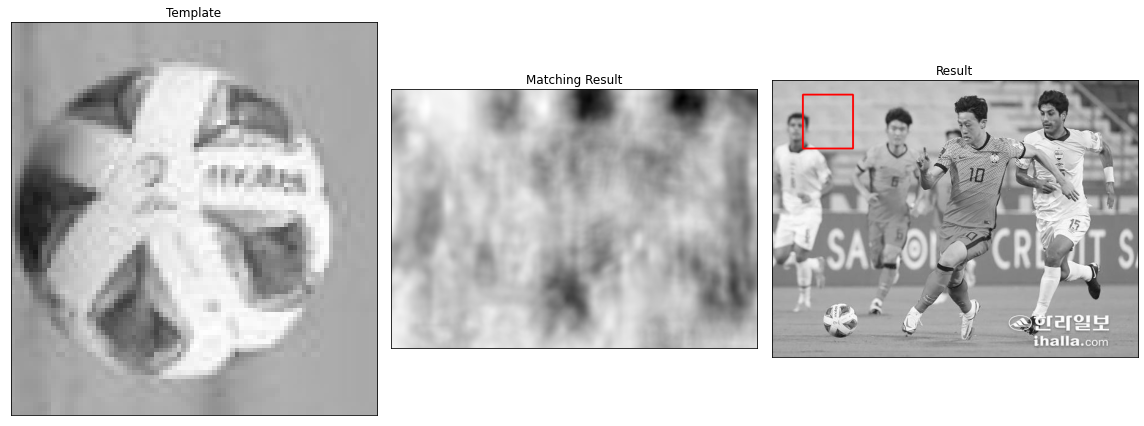

In [9]:
template=cv2.rotate(template_1, cv2.ROTATE_90_CLOCKWISE) # 시계방향으로 90도 회전